In [31]:
# Load all the dataframes we use and plot all info we have on a few particular patients to get an insight in the data (work together on this maybe)

In [32]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

possible_paths = [
    'C:/Users/lenne/OneDrive/Documenten/Master of Statistics and Data Science/2023-2024/Master thesis/MSOAC Placebo Data',
    'C:/Users/anaso/Desktop/SOFIA MENDES/KU Leuven/Master Thesis/MSOAC Placebo dataset/csv files'
]

In [33]:
# Functional Tests
file_name = 'ft.csv'
file_path = next(f'{path}/{file_name}' for path in possible_paths if os.path.exists(f'{path}/{file_name}'))

# Read the CSV file into a DataFrame
ftests = pd.read_csv(file_path)


# Visual Tests
file_name = 'oe.csv'
file_path = next(f'{path}/{file_name}' for path in possible_paths if os.path.exists(f'{path}/{file_name}'))

# Read the CSV file into a DataFrame
opt = pd.read_csv(file_path)

# Questionnaires
file_name = 'qs.csv'
file_path = next(f'{path}/{file_name}' for path in possible_paths if os.path.exists(f'{path}/{file_name}'))

# Read the CSV file into a DataFrame
qs = pd.read_csv(file_path)

C:\Users\lenne\AppData\Local\Temp\ipykernel_19004\2546211848.py:6: DtypeWarning: Columns (22,28,30) have mixed types. Specify dtype option on import or set low_memory=False.
  ftests = pd.read_csv(file_path)
C:\Users\lenne\AppData\Local\Temp\ipykernel_19004\2546211848.py:14: DtypeWarning: Columns (10,12,15,16,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  opt = pd.read_csv(file_path)
C:\Users\lenne\AppData\Local\Temp\ipykernel_19004\2546211848.py:21: DtypeWarning: Columns (4,9,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  qs = pd.read_csv(file_path)


#### Patient-specific plot

In [34]:
patient = 'MSOAC/0031'

In [35]:
ftests_filtered = ftests.loc[ftests['USUBJID'] == patient, ['USUBJID', 'FTTEST', 'FTSTRESN', 'FTDY']]
ftests_filtered

,USUBJID,FTTEST,FTSTRESN,FTDY
23961,MSOAC/0031,NHPT01-Time to Complete 9-Hole Peg Test,14.2,-28.0
23975,MSOAC/0031,NHPT01-Time to Complete 9-Hole Peg Test,16.7,-28.0
23979,MSOAC/0031,NHPT01-Time to Complete 9-Hole Peg Test,16.9,-28.0
23998,MSOAC/0031,NHPT01-Time to Complete 9-Hole Peg Test,18.3,-28.0
24162,MSOAC/0031,T25FW1-Time to Complete 25-Foot Walk,3.5,-28.0
...,...,...,...,...
172653,MSOAC/0031,NHPT01-Time to Complete 9-Hole Peg Test,19.8,836.0
172654,MSOAC/0031,NHPT01-Time to Complete 9-Hole Peg Test,20.3,836.0
172664,MSOAC/0031,T25FW1-Time to Complete 25-Foot Walk,4.3,836.0
172665,MSOAC/0031,T25FW1-Time to Complete 25-Foot Walk,4.8,836.0


In [36]:
# Group by unique values of FTTEST and FTDY and calculate the mean of FTSTRESN
mean_ftstresn = ftests_filtered.groupby(['FTTEST', 'FTDY'])['FTSTRESN'].mean().reset_index()
mean_ftstresn

,FTTEST,FTDY,FTSTRESN
0,NHPT01-Time to Complete 9-Hole Peg Test,-28.0,16.525
1,NHPT01-Time to Complete 9-Hole Peg Test,-14.0,16.650
2,NHPT01-Time to Complete 9-Hole Peg Test,-8.0,17.275
3,NHPT01-Time to Complete 9-Hole Peg Test,1.0,17.100
4,NHPT01-Time to Complete 9-Hole Peg Test,85.0,18.725
5,NHPT01-Time to Complete 9-Hole Peg Test,165.0,19.225
6,NHPT01-Time to Complete 9-Hole Peg Test,253.0,17.500
7,NHPT01-Time to Complete 9-Hole Peg Test,337.0,16.350
8,NHPT01-Time to Complete 9-Hole Peg Test,421.0,20.900
9,NHPT01-Time to Complete 9-Hole Peg Test,505.0,17.900


In [37]:
opt_filtered = opt.loc[opt['USUBJID'] == patient, ['USUBJID', 'OETEST', 'OESTRESN', 'OEDY']]
opt_filtered = opt_filtered.dropna(subset=['OESTRESN'])
opt_filtered

,USUBJID,OETEST,OESTRESN,OEDY
1469,MSOAC/0031,Number of Letters Correct,48.0,-28.0
3392,MSOAC/0031,Number of Letters Correct,54.0,-14.0
3393,MSOAC/0031,Number of Letters Correct,54.0,750.0
3394,MSOAC/0031,Number of Letters Correct,54.0,421.0
3395,MSOAC/0031,Number of Letters Correct,54.0,589.0
3936,MSOAC/0031,Number of Letters Correct,55.0,673.0
4876,MSOAC/0031,Number of Letters Correct,56.0,1.0
4877,MSOAC/0031,Number of Letters Correct,56.0,165.0
4878,MSOAC/0031,Number of Letters Correct,56.0,253.0
5263,MSOAC/0031,Number of Letters Correct,57.0,-8.0


In [38]:
# Group by unique values of OETEST and OEDY and calculate the mean of FTSTRESN
mean_oestresn = opt_filtered.groupby(['OETEST', 'OEDY'])['OESTRESN'].mean().reset_index()
mean_oestresn

,OETEST,OEDY,OESTRESN
0,Number of Letters Correct,-28.0,27.333333
1,Number of Letters Correct,-14.0,31.333333
2,Number of Letters Correct,-8.0,30.333333
3,Number of Letters Correct,1.0,31.666667
4,Number of Letters Correct,85.0,37.333333
5,Number of Letters Correct,165.0,31.333333
6,Number of Letters Correct,253.0,36.666667
7,Number of Letters Correct,337.0,36.000000
8,Number of Letters Correct,421.0,32.000000
9,Number of Letters Correct,505.0,34.333333


In [39]:
qs_filtered = qs.loc[qs['USUBJID'] == patient, ['USUBJID', 'QSTEST', 'QSSTRESN', 'QSDY']]
qs_filtered = qs_filtered[qs_filtered['QSTEST'].str.contains('EDSS', case=False, na=False)]
qs_filtered = qs_filtered.sort_values(by='QSDY')
qs_filtered

,USUBJID,QSTEST,QSSTRESN,QSDY
205227,MSOAC/0031,EDSS01-Expanded Disability Score,1.0,-6.0
39228,MSOAC/0031,EDSS01-Expanded Disability Score,1.0,1.0
355054,MSOAC/0031,EDSS01-Expanded Disability Score,1.0,85.0
389162,MSOAC/0031,EDSS01-Expanded Disability Score,1.5,165.0
421395,MSOAC/0031,EDSS01-Expanded Disability Score,1.5,253.0
225140,MSOAC/0031,EDSS01-Expanded Disability Score,1.5,268.0
427334,MSOAC/0031,EDSS01-Expanded Disability Score,1.0,337.0
439604,MSOAC/0031,EDSS01-Expanded Disability Score,1.0,421.0
441790,MSOAC/0031,EDSS01-Expanded Disability Score,1.0,505.0
443950,MSOAC/0031,EDSS01-Expanded Disability Score,1.0,589.0


In [40]:
df1 = mean_ftstresn
df2 = mean_oestresn
df3 = qs_filtered

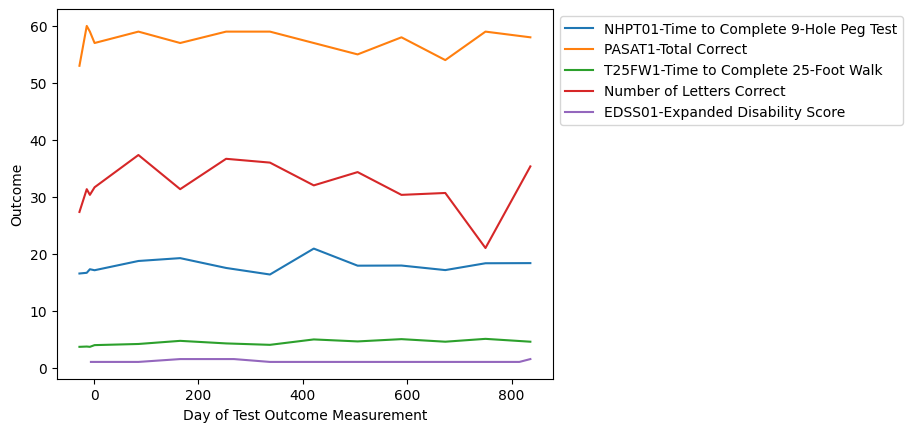

In [41]:
# Plot for df1
for fttest_value in df1['FTTEST'].unique():
    df_subset = df1[df1['FTTEST'] == fttest_value]
    plt.plot(df_subset['FTDY'], df_subset['FTSTRESN'], label=f'{fttest_value}')

# Plot for df2
for oetest_value in df2['OETEST'].unique():
    df_subset = df2[df2['OETEST'] == oetest_value]
    plt.plot(df_subset['OEDY'], df_subset['OESTRESN'], label=f'{oetest_value}')

# Plot for df3
for qstest_value in df3['QSTEST'].unique():
    df_subset = df3[df3['QSTEST'] == qstest_value]
    plt.plot(df_subset['QSDY'], df_subset['QSSTRESN'], label=f'{qstest_value}')

plt.xlabel('Day of Test Outcome Measurement')
plt.ylabel('Outcome')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()